In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py


In [2]:
import lib

In [3]:
lib.plotting.setup()

In [26]:
onecolumn_kwargs = {
    "width": 2,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1,
    "fig_width": 3 + 4/12,
    "fig_height": 3,
}
twocolumn_kwargs = {
    "width": 7 - 16/12,
    "height": 2,
    "horizontal_margin": 8/12,
    "vertical_margin": 6/12,
    "gutter": 1,
    "fig_width": 7,
    "fig_height": 3,
}
# twocolumn_kwargs = {
#     "width": 2,
#     "height": 2,
#     "horizontal_margin": 8/12,
#     "vertical_margin": 6/12,
#     "gutter": 1 + 8/12,
#     "fig_width": 7,
#     "fig_height": 3,
# }

---

In [5]:
input_file = "../N_gamma_alpha_v0_jk.hdf5"

In [6]:
# approx colors from Boyan
tomo_colors = {
    0: "#3BB470",
    1: "#FA7F72",
    2: "#DD9FDD",
    3: "#6495EC",
}
ALPHA = {
    # -1: (0.0, 6.0),
    0: (0.0, 0.3),
    1: (0.3, 0.6),
    2: (0.6, 0.9),
    3: (0.9, 1.2),
    4: (1.2, 1.5),
    5: (1.5, 1.8),
    6: (1.8, 2.1),
    7: (2.1, 2.4),
    8: (2.4, 2.7),
    9: (2.7, 6.0),
}

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:214: UserWarning: Total axes width (3.333333333333333) less than figure width (3.3333333333333335)
  warnings.warn(f"Total axes width ({total_width}) less than figure width ({fig_width})")


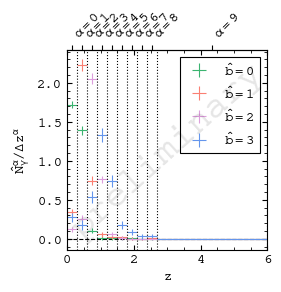

In [40]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **onecolumn_kwargs,
)

axs.axhline(0, ls="--")

with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] >= 0
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        axs.errorbar(
            zc,
            Ngammaalpha_mean / zd,
            [
                Ngammaalpha_var**(1/2) * 3 / zd,
                Ngammaalpha_var**(1/2) * 3 / zd,
            ],
            [
                zc - zl,
                zh - zc,
            ],
            fmt="none",
            c=tomo_colors[tomographic_bin],
            label=f"$\\hat{{b}} = {tomographic_bin}$",
        )

for i, (_zl, _zh) in enumerate(zip(zl, zh)):
    axs.axvline(_zh, ls=":")
    # axs.text(
    #     zh,
    #     0,
    #     f"$\\alpha = {i}$",
    #     ha="right",
    #     va="center",
    # )

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("$z$")
axs.set_ylabel("$\\hat{N}_{\\gamma}^{\\alpha} / \\Delta z^{\\alpha}$")
axs.set_xlim(0, 6)
axs.legend(loc="upper right")

lib.plotting.watermark(fig)

fig.savefig("N_gamma_alpha.pdf")

plt.show()

/global/u2/s/smau/projects/des/y6-image-sims-analysis/plots/lib/plotting.py:212: UserWarning: Total axes width (7.000000000000001) greater than figure width (7.0)
  warnings.warn(f"Total axes width ({total_width}) greater than figure width ({fig_width})")


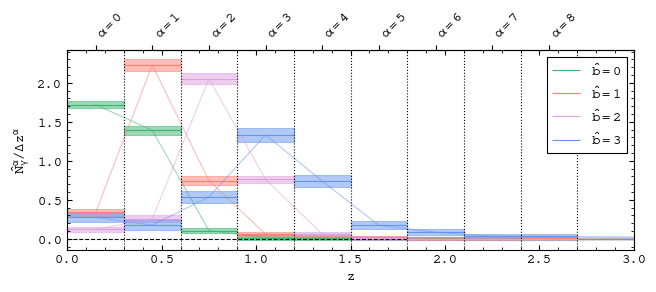

In [41]:
fig, axs = lib.plotting.make_axes(
    1, 1,
    **twocolumn_kwargs,
)

axs.axhline(0, ls="--")

with h5py.File(input_file, "r") as N_gamma_alpha:
    for tomographic_bin in lib.const.TOMOGRAPHIC_BINS:
        # tomo_results = results[np.nonzero(results["tomographic_bin"] == tomographic_bin)]
        # zlow = tomo_results["zlow"]
        # zhigh = tomo_results["zhigh"]
        # zcenter = 0.5 * (zlow + zhigh)
        # zdiff = zhigh - zlow
        alpha_sel = N_gamma_alpha["shear/mean_params"][:, 0] >= 0
        tomo_sel = N_gamma_alpha["shear/mean_params"][:, 1] == tomographic_bin
        sel = alpha_sel & tomo_sel
        alphas = N_gamma_alpha["shear/mean_params"][sel, 0]
        Ngammaalpha_mean = N_gamma_alpha["shear/mean"][sel]
        Ngammaalpha_var = np.diag(N_gamma_alpha["shear/cov"])[sel]
        zl = np.array([ALPHA[alpha][0] for alpha in alphas])
        zh = np.array([ALPHA[alpha][1] for alpha in alphas])
        # zl = Ngammaalpha["zlow"]
        # zh = Ngammaalpha["zhigh"]
        zc = 0.5 * (zl + zh)
        zd = zh - zl
    
        # N = tomo_results["dg_obs_mean"] / tomo_results["dg_true_mean"]
        # # N_error = 3 * tomo_results["dg_obs_std"] / tomo_results["dg_true_std"]
        # N_error = 3 * np.abs(N) * np.hypot(tomo_results["dg_obs_std"] / tomo_results["dg_obs_mean"], tomo_results["dg_true_std"] / tomo_results["dg_true_mean"])
    
        # axs.errorbar(
        #     zc,
        #     Ngammaalpha_mean / zd,
        #     [
        #         Ngammaalpha_var**(1/2) * 3 / zd,
        #         Ngammaalpha_var**(1/2) * 3 / zd,
        #     ],
        #     [
        #         zc - zl,
        #         zh - zc,
        #     ],
        #     fmt="none",
        #     c=tomo_colors[tomographic_bin],
        #     label=f"$\\hat{{b}} = {tomographic_bin}$",
        # )
        for i, alpha in ALPHA.items():
            axs.fill_between(
                [zl[i], zh[i]],
                (Ngammaalpha_mean / zd - Ngammaalpha_var**(1/2) * 3 / zd)[i],
                (Ngammaalpha_mean / zd + Ngammaalpha_var**(1/2) * 3 / zd)[i],
                color=tomo_colors[tomographic_bin],
                alpha=0.5,
            )
        axs.hlines(
            Ngammaalpha_mean / zd,
            zl,
            zh,
            color=tomo_colors[tomographic_bin],
            label=f"$\\hat{{b}} = {tomographic_bin}$",
        )
        axs.plot(
            zc,
            Ngammaalpha_mean / zd,
            color=tomo_colors[tomographic_bin],
            alpha=0.5,
        )

for i, (_zl, _zh) in enumerate(zip(zl, zh)):
    axs.axvline(_zh, ls=":")
    # axs.text(
    #     zh,
    #     0,
    #     f"$\\alpha = {i}$",
    #     ha="right",
    #     va="center",
    # )

secax = axs.secondary_xaxis("top")
secax.set_ticks(
    zc,
    labels=[f"$\\alpha = {i}$" for i, z in enumerate(zc)],
    minor=False,
    ha="left",
    rotation=45,
)
secax.set_ticks(
    [],
    minor=True,
)
secax.tick_params(
    direction="out",
)


axs.set_xlabel("$z$")
axs.set_ylabel("$\\hat{N}_{\\gamma}^{\\alpha} / \\Delta z^{\\alpha}$")
axs.set_xlim(0, 3)
axs.legend(loc="upper right")

# lib.plotting.watermark(fig)

# fig.savefig("N_gamma_alpha.pdf")

plt.show()